# 7.3 次数相関の測定
次数相関関数（degree correlation function）を使えば，次数相関を簡単に測定できる．\
次数相関関数$k_{\text{nn}}(k)$は，次のように定義される．

$$
k_{\text{nn}}(k) = \sum_{k'}k'P(k'|k) \tag{7.7}
$$

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
#from matplotlib.ticker import ScalarFormatter

In [2]:
# Read network data
# random = nx.erdos_renyi_graph(10**4, 1/5)
collabo = nx.read_gml("./collaboration_network/cond-mat-2005.gml", label=None)
# power = nx.read_gml("./power_grid/power.gml", label=None)
# protein = nx.read_edgelist('./protein_network/protein.txt', nodetype=str)
hashtag = nx.read_graphml("./hashtag_network/hashtag.graphml")

In [3]:
def get_N_L(G):
    return G.number_of_nodes(), G.number_of_edges()

def get_k_knn(G):
    knn_dict = nx.k_nearest_neighbors(G)
    return list(knn_dict.keys()), list(knn_dict.values())

def plt_scatter(k, knn, title, jpn=False):
    # Initialize layout
    fig, ax = plt.subplots(figsize=(6,6))
    # Add scatterplot
    ax.set_title(title, fontsize=20)
    if not jpn:
        plt.rcParams['font.family'] = 'Arial'
    ax.scatter(k, knn, s=60, alpha=0.7, c="indigo",edgecolors="indigo")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$k$", fontsize=14)
    ax.set_ylabel(r"$k_{nn}$", rotation="horizontal", fontsize=14)
    #ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #ax.ticklabel_format(style="sci", axis="y", scilimits=(1,1))
    fig.savefig(f"{title}.png")

In [4]:
# random network
# k_r, knn_r = get_k_knn(random)
# collaboration network
k_c, knn_c = get_k_knn(collabo)
# power grid
# k_p, knn_p = get_k_knn(power)
# protein
# k_pr, knn_pr = get_k_knn(protein)
# hashtag
k_h, knn_h = get_k_knn(hashtag)

C:\Users\yuki\AppData\Local\Temp\ipykernel_18356\3800548618.py:5: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  knn_dict = nx.k_nearest_neighbors(G)


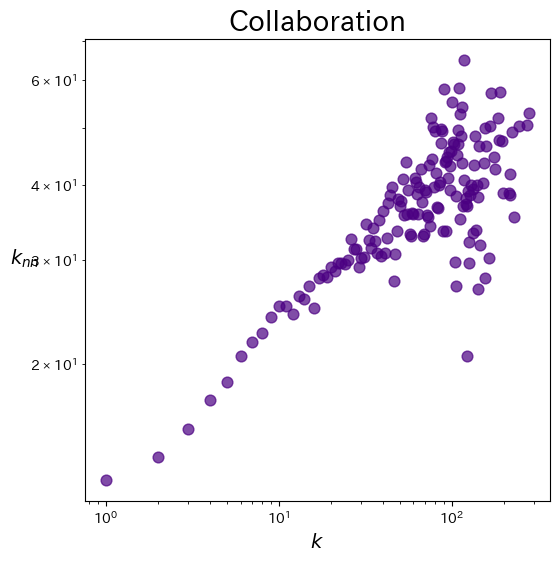

In [5]:
# collaboration network
plt_scatter(k_c, knn_c, "Collaboration")

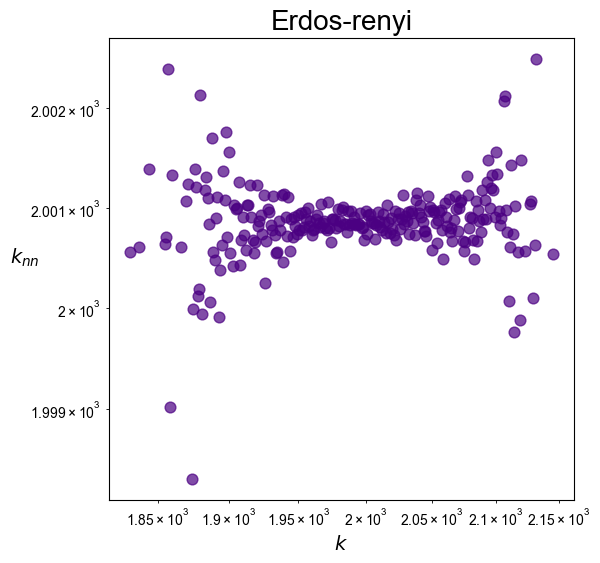

In [6]:
# random network
plt_scatter(k_r, knn_r, "Erdos-renyi")

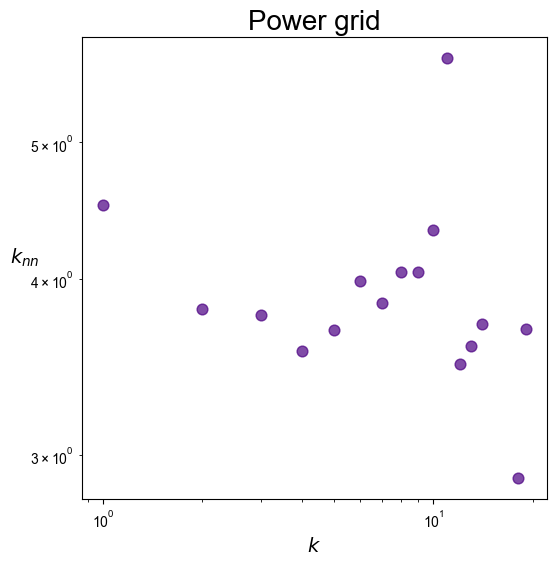

In [7]:
# power grid
plt_scatter(k_p, knn_p, "Power grid")

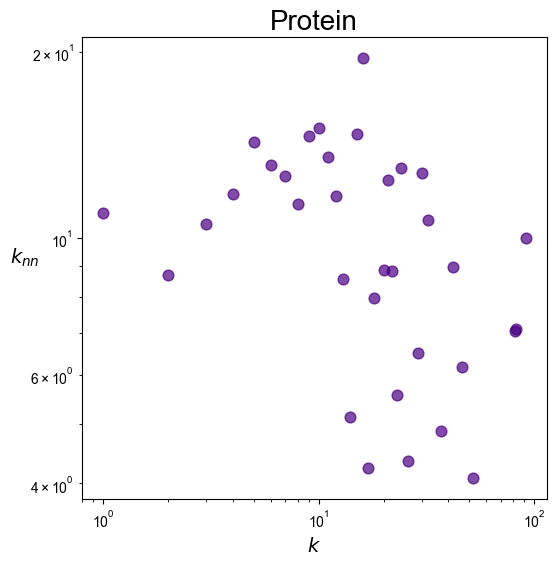

In [8]:
# protein
plt_scatter(k_pr, knn_pr, "Protein")

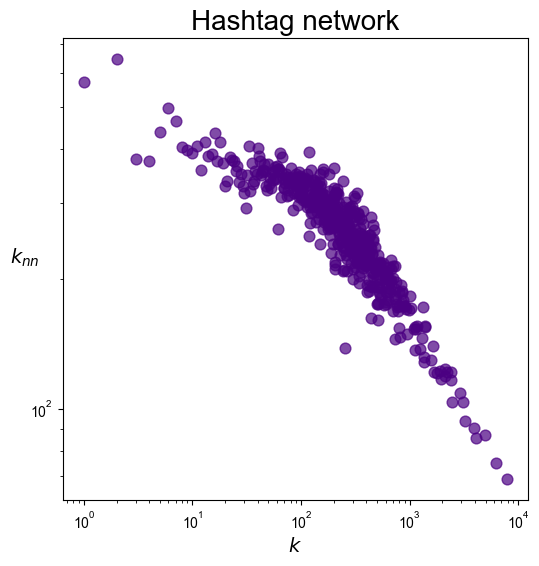

In [9]:
# hashtag
plt_scatter(k_h, knn_h, "Hashtag network", True)

## 相関指数$\mu$
次数相関関数$k_{\text{nn}}(k)$は，
$$
k_{\text{nn}}(k) = ak^{\mu} \tag{7.10}
$$
によって近似できる．ここでは，Scientific collaboration networkとHashtag networkについて，$a$と$\mu$を最小二乗法（OLS）で推定する．

In [36]:
df_c = pd.DataFrame({"k_c" : k_c, "knn_c" : knn_c})
df_h = pd.DataFrame({"k_h" : k_h, "knn_h" : knn_h})

In [37]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   k_c     160 non-null    int64  
 1   knn_c   160 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.6 KB


In [38]:
df_c.describe()

,k_c,knn_c
count,160.00000,160.000000
mean,86.83125,37.316002
std,59.76655,9.826714
min,0.00000,0.000000
25%,39.75000,30.799771
50%,79.50000,37.415264
75%,121.25000,43.694362
max,278.00000,64.982906


In [39]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   k_h     490 non-null    int64  
 1   knn_h   490 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.8 KB


In [40]:
df_h.describe()

,k_h,knn_h
count,490.000000,490.000000
mean,414.044898,265.547893
std,679.596529,74.457857
min,1.000000,68.702640
25%,123.250000,214.728526
50%,246.500000,265.667410
75%,438.750000,316.236944
max,7802.000000,646.147826


In [41]:
# kとknnの対数をとって、単回帰分析
df_c["k_c_log"] = np.log(df_c["k_c"])
df_c["knn_c_log"] = np.log(df_c["knn_c"])

df_h["k_h_log"] = np.log(df_h["k_h"])
df_h["knn_h_log"] = np.log(df_h["knn_h"])

C:\Users\yuki\Desktop\github\NetSci-Seminar-2022\.venv\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yuki\Desktop\github\NetSci-Seminar-2022\.venv\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
# 無限大,マイナス無限大をNanに直し、欠損とカウントさせる
df_c = df_c.replace([np.inf, -np.inf], np.nan)
#df_h = df_h.replace([np.inf, -np.inf], np.nan)

In [43]:
print(df_c.isnull().sum())
print("===================")
print(df_h.isnull().sum())

k_c          0
knn_c        0
k_c_log      1
knn_c_log    1
dtype: int64
k_h          0
knn_h        0
k_h_log      0
knn_h_log    0
dtype: int64


In [44]:
# nanがある行を削除
df_c = df_c.dropna()

In [45]:
print(df_c.isnull().sum())
print("===================")
print(df_h.isnull().sum())

k_c          0
knn_c        0
k_c_log      0
knn_c_log    0
dtype: int64
k_h          0
knn_h        0
k_h_log      0
knn_h_log    0
dtype: int64


$(7.10)$式に自然対数変換を施して，回帰分析を行う．
$$
\log k_{\text{nn}}(k) = \log a + \mu\log k
$$

In [ ]:
# 単回帰（'非説明変数 ~ 説明変数'）
formula_c = 'knn_c_log ~ k_c_log'
formula_h = 'knn_h_log ~ k_h_log'

# fit
res_c = ols(formula_c, data=df_c).fit()
res_h = ols(formula_h, data=df_h).fit()

# show result
print(res_c.summary().tables[1])
print(res_h.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6793      0.056     47.587      0.000       2.568       2.790
k_c_log        0.2206      0.013     16.653      0.000       0.194       0.247
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7734      0.029    229.965      0.000       6.716       6.831
k_h_log       -0.2293      0.005    -42.960      0.000      -0.240      -0.219


In [47]:
mu_c = 0.2206
a_c = np.exp(2.6793)
print(f"Collaboration: mu = {mu_c}, a = {a_c}")

mu_h = -0.2293
a_h = np.exp(6.7734)
print(f"Hashtag: mu = {mu_h}, a = {a_h}")

Collaboration: mu = 0.2206, a = 14.574887303087895
Hashtag: mu = -0.2293, a = 874.2793963256169


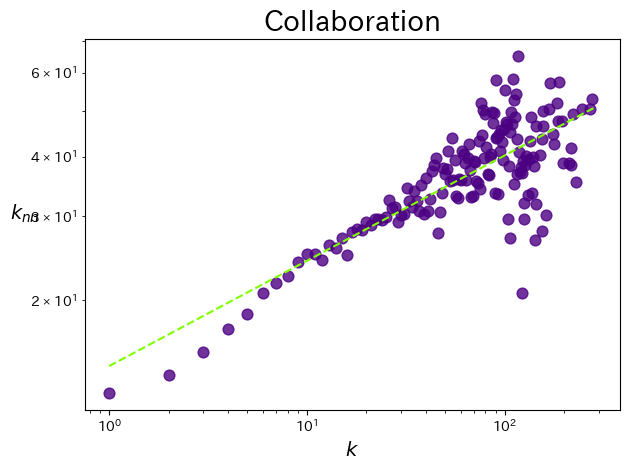

In [57]:
fig, ax = plt.subplots()
ax.set_title("Collaboration", fontsize=20)

k = np.arange(1, 290)
knn = a_c*k**mu_c
# Add lineplot
ax.plot(k, knn, c="chartreuse", linestyle="--")
# Add scatterplot
ax.scatter(k_c, knn_c, s=60, alpha=0.8, c="indigo",edgecolors="indigo");
ax.set_xlabel(r"$k$", fontsize=14)
ax.set_ylabel(r"$k_{nn}$", rotation="horizontal", fontsize=14)
ax.set_xscale("log")
ax.set_yscale("log")
# fig.savefig("collabo_log.png")

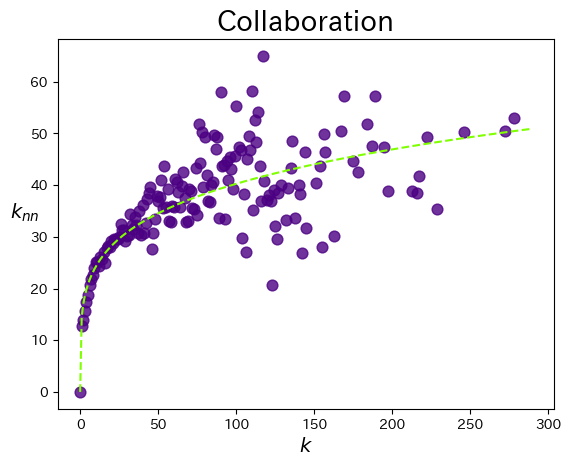

In [54]:
fig, ax = plt.subplots()
ax.set_title("Collaboration", fontsize=20)

k = np.arange(290)
knn = a_c*k**mu_c
# Add lineplot
ax.plot(k, knn, c="chartreuse", linestyle="--")
# Add scatterplot
ax.scatter(k_c, knn_c, s=60, alpha=0.8, c="indigo",edgecolors="indigo");
ax.set_xlabel(r"$k$", fontsize=14)
ax.set_ylabel(r"$k_{nn}$", rotation="horizontal", fontsize=14)
# fig.savefig("collabo.png")

C:\Users\yuki\AppData\Local\Temp\ipykernel_18356\1215767869.py:5: RuntimeWarning: divide by zero encountered in power
  knn = a_h*k**mu_h


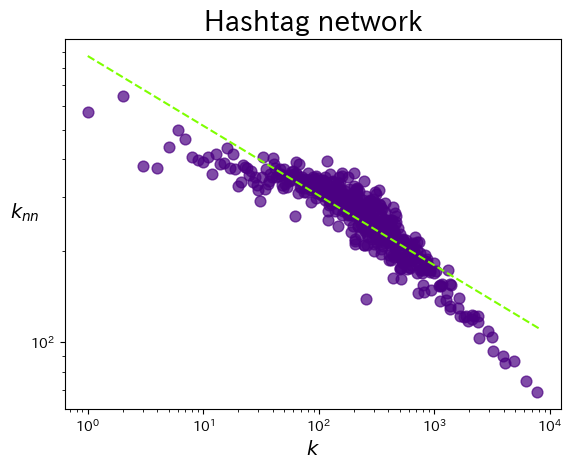

In [55]:
fig, ax = plt.subplots()
ax.set_title("Hashtag network", fontsize=20)

k = np.arange(0, 8000)
knn = a_h*k**mu_h
# Add lineplot
ax.plot(k, knn, c="chartreuse", linestyle="--")
# Add scatterplot
ax.scatter(k_h, knn_h, s=60, alpha=0.7, c="indigo",edgecolors="indigo");
ax.set_xlabel(r"$k$", fontsize=14)
ax.set_ylabel(r"$k_{nn}$", rotation="horizontal", fontsize=14)
ax.set_xscale("log")
ax.set_yscale("log")
# fig.savefig("hashtag_log.png")

C:\Users\yuki\AppData\Local\Temp\ipykernel_18356\376635928.py:5: RuntimeWarning: divide by zero encountered in power
  knn = a_h*k**mu_h


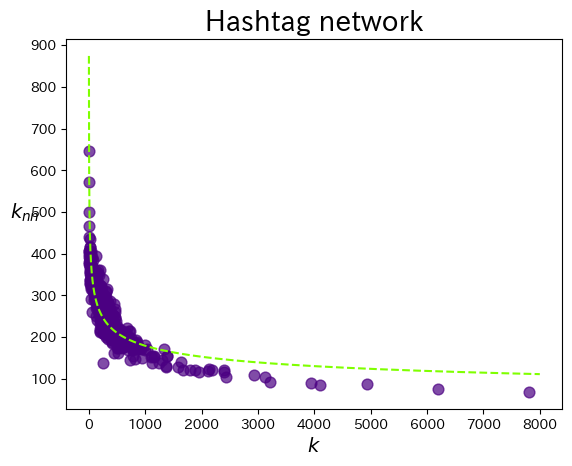

In [56]:
fig, ax = plt.subplots()
ax.set_title("Hashtag network", fontsize=20)

k = np.arange(8000)
knn = a_h*k**mu_h
# Add lineplot
ax.plot(k, knn, c="chartreuse", linestyle="--")
# Add scatterplot
ax.scatter(k_h, knn_h, s=60, alpha=0.7, c="indigo",edgecolors="indigo");
ax.set_xlabel(r"$k$", fontsize=14)
ax.set_ylabel(r"$k_{nn}$", rotation="horizontal", fontsize=14)
# fig.savefig("hashtag.png")

## 次数相関係数$r$
$$
\begin{align*}
r = \sum_{jk}\frac{jk(e_{jk} - q_jq_k)}{\sigma^2} \tag{7.11} \\
\sigma^2 = \sum_{k} k^2 q_k - \left[\sum_{k} k q_k\right]^2 \tag{7.12}
\end{align*}
$$
$(7.11)$式は，以下の関数で計算できる．
- `nx.degree_assortativity_coefficient(G)`
- `nx.degree_pearson_correlation_coefficient(G)`

後者は，`scipy.stats.pearsonr()`関数を使用しているので，より速く計算できる．

[degree_pearson_correlation_coefficient — NetworkX 3.0 documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.degree_pearson_correlation_coefficient.html) 

In [12]:
df = pd.DataFrame(columns=["collaboration", "erdos-renyi", "power-grid", "protein", "hashtag"], index=[r"$N$", r"$r$"])
df.at[r"$r$", "collaboration"] = nx.degree_assortativity_coefficient(collabo)
df.at[r"$r$", "erdos-renyi"] = nx.degree_assortativity_coefficient(random)
df.at[r"$r$", "power-grid"] = nx.degree_assortativity_coefficient(power)
df.at[r"$r$", "protein"] = nx.degree_assortativity_coefficient(protein)
df.at[r"$r$", "hashtag"] = nx.degree_assortativity_coefficient(hashtag)
df.at[r"$N$", "collaboration"] = collabo.number_of_nodes()
df.at[r"$N$", "erdos-renyi"] = random.number_of_nodes()
df.at[r"$N$", "power-grid"] = power.number_of_nodes()
df.at[r"$N$", "protein"] = protein.number_of_nodes()
df.at[r"$N$", "hashtag"] = hashtag.number_of_nodes()

In [13]:
df

,collaboration,erdos-renyi,power-grid,protein,hashtag
$N$,40421,10000,4941,2018,32722
$r$,0.186327,0.000407,0.003457,-0.055078,-0.057815


In [15]:
# See if the two functions are different
print(nx.degree_pearson_correlation_coefficient(collabo), nx.degree_assortativity_coefficient(collabo))
print(nx.degree_pearson_correlation_coefficient(power), nx.degree_assortativity_coefficient(power))
print(nx.degree_pearson_correlation_coefficient(random), nx.degree_assortativity_coefficient(random))
print(nx.degree_pearson_correlation_coefficient(protein), nx.degree_assortativity_coefficient(protein))
print(nx.degree_pearson_correlation_coefficient(hashtag), nx.degree_assortativity_coefficient(hashtag))

0.18632684905229746 0.18632684905230537
0.0034569877442049007 0.0034569877442048825
0.0004065224085120808 0.0004065224085383577
-0.0550781093422518 -0.05507810934225171
-0.057814758187365506 -0.05781475818733237
